# Import necessary libraries

In [8]:
import sys
import os
import pandas as pd
from collections import Counter
import re
from datetime import datetime
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import spacy


# Add the scripts directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))
from descriptive_analysis import NewsDataAnalysis
from CSVReader import CSV_Reader



# Load data

In [14]:

# Create an instance of CSVReader
csv_reader = CSV_Reader('../data/cleaned_analyst_ratings.csv')

# Load the data
csv_reader.load_data()

# Get the loaded data
raw_data = csv_reader.get_data()

# Now, you can use raw_data as needed
print(raw_data.head())  # Example usage


Data successfully loaded from ../data/cleaned_analyst_ratings.csv
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                  date stock  
0  2020-06-05 10:30:54     A  
1  2020-06-0

# Load columns name

In [15]:

# Load the data
raw_data = pd.read_csv("../data/cleaned_analyst_ratings.csv")
# List the columns
columns = raw_data.columns
print("Columns in the CSV file:")
print(columns)


Columns in the CSV file:
Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


# Format date

In [16]:

# Load your Excel file
raw_data = pd.read_csv("../data/cleaned_analyst_ratings.csv")

# Convert the date column to a consistent date format (YYYY-MM-DD)
raw_data['date'] = pd.to_datetime(raw_data['date'], errors='coerce').dt.date

# Save the cleaned data back to an Excel file
raw_data.to_csv('cleaned_file.csv', index=False)  # Replace 'cleaned_file.xlsx' with your desired output file name

print("First date in the DataFrame:", raw_data['date'].iloc[3])



First date in the DataFrame: 2020-05-22


# Descriptive analysis

Descriptive Statistics for Headline Length:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

Number of Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Matthew Ely               1
Frank Ochoa               1
Jeremie Capron            1
Marvin Dumont             1
Igor Gonta                1
Name: count, Length: 1034, dtype: int64

Number of Articles Published per Day:
date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 2528, dtype: int64


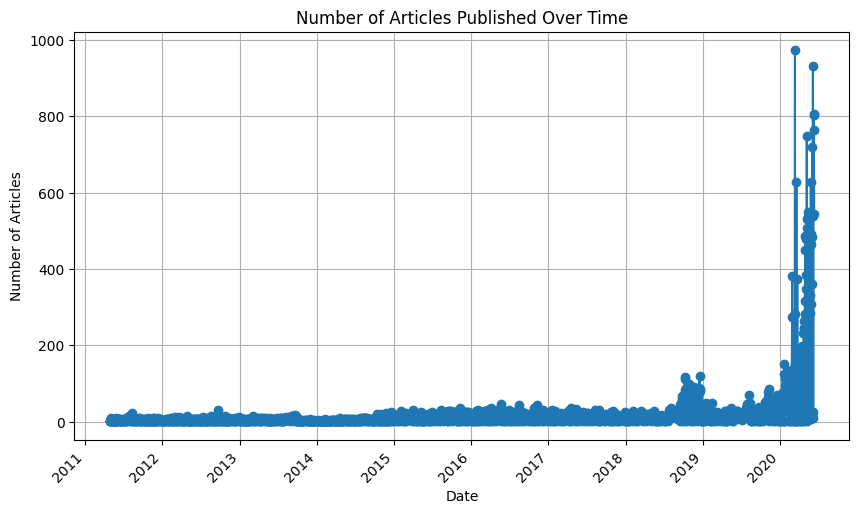

In [6]:



# Example usage:

# Assuming 'raw_data' is a pandas DataFrame containing your data
# raw_data = pd.read_csv('your_data_file.csv') # Load your data

# Initialize the class with the data
analysis = NewsDataAnalysis(raw_data)

# Get headline length statistics
headline_stats = analysis.headline_length_statistics()
print("Descriptive Statistics for Headline Length:")
print(headline_stats)

# Get articles per publisher
publisher_counts = analysis.articles_per_publisher()
print("\nNumber of Articles per Publisher:")
print(publisher_counts)

# Get articles per day
articles_per_day = analysis.articles_per_day()
print("\nNumber of Articles Published per Day:")
print(articles_per_day)

# Plot articles over time
analysis.plot_articles_over_time()



# Sentiment analysis

Sentiment Analysis Statistics:
count    1.407328e+06
mean     4.905657e-02
std      1.830652e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: sentiment, dtype: float64


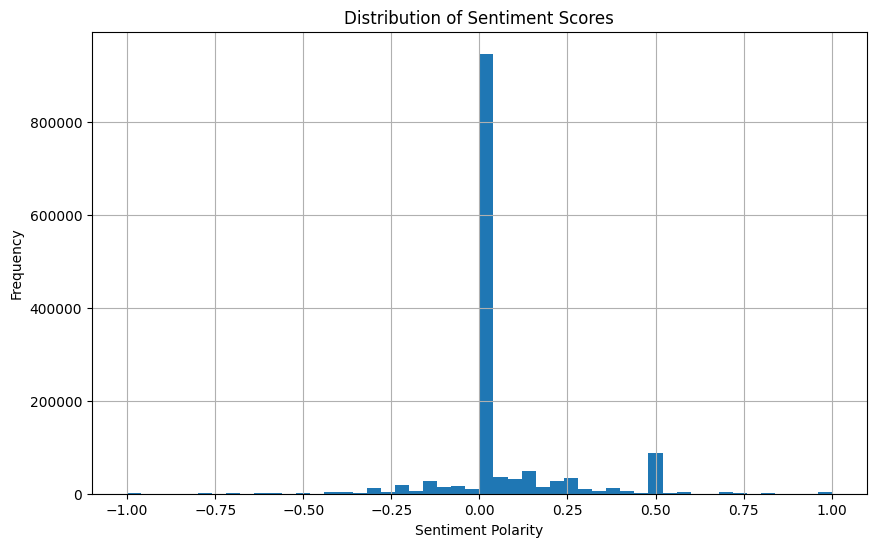


Topic #1:
shares trading industry stocks stock companies benzinga highest oil analyst

Topic #2:
week stocks hit highs lows says hitting shares announces new

Topic #3:
benzinga earnings scheduled upgrades downgrades stocks watch 2018 losers week

Topic #4:
buy maintains raises target price biggest movers neutral downgrades lowers

Topic #5:
est eps session moving reports sales stocks midday premarket estimate


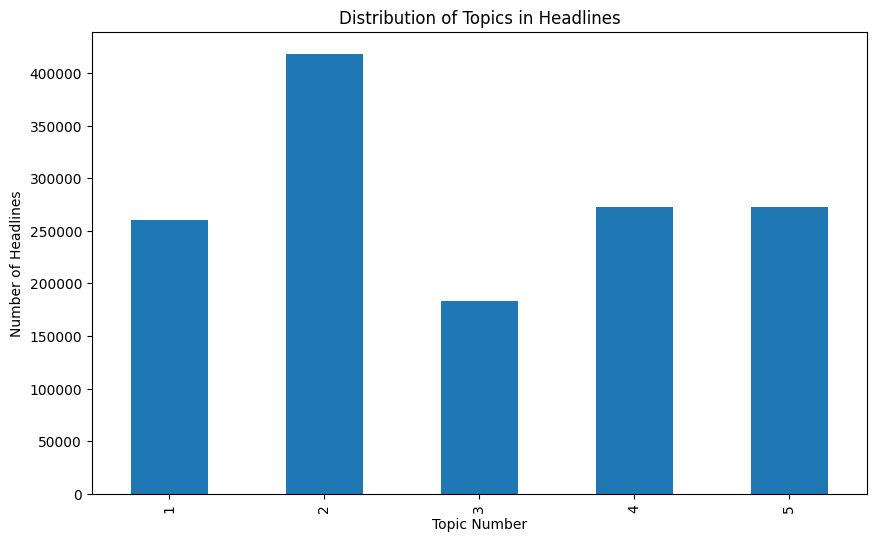

In [7]:

# Load your raw data
raw_data = pd.read_csv("../data/raw_analyst_ratings.csv")

# Step 1: Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment analysis function to the 'headline' column
raw_data['sentiment'] = raw_data['headline'].apply(get_sentiment)

# Print basic sentiment statistics
print("Sentiment Analysis Statistics:")
print(raw_data['sentiment'].describe())

# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
raw_data['sentiment'].hist(bins=50)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Step 2: Topic Modeling using TF-IDF and LDA

# Preprocess the headlines for NLP
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words (e.g., "a", "of")
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply the preprocessing function to the 'headline' column
raw_data['cleaned_headline'] = raw_data['headline'].apply(preprocess_text)

# Step 2a: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
tfidf_matrix = tfidf_vectorizer.fit_transform(raw_data['cleaned_headline'])

# Step 2b: Topic Modeling with LDA
n_topics = 5  # Number of topics to extract
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(tfidf_matrix)

# Display the top words in each topic
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

n_top_words = 10
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(lda, tfidf_feature_names, n_top_words)

# Optional: Assign each headline to a topic
topic_values = lda.transform(tfidf_matrix)
raw_data['topic'] = topic_values.argmax(axis=1) + 1

# Plot the distribution of topics
plt.figure(figsize=(10, 6))
raw_data['topic'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Topics in Headlines')
plt.xlabel('Topic Number')
plt.ylabel('Number of Headlines')
plt.show()

# Keyword/Phrase Extraction using N-grams

In [23]:
# Define a function to extract n-grams
def extract_ngrams(texts, n=2):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english', min_df=2)
    ngrams_matrix = vectorizer.fit_transform(texts)
    ngrams = vectorizer.get_feature_names_out()
    ngrams_freq = ngrams_matrix.sum(axis=0).A1
    return dict(zip(ngrams, ngrams_freq))

# Extract bigrams (2-grams)
bigrams = extract_ngrams(raw_data['headline'], n=2)
print("Top 10 Bigrams:")
print(sorted(bigrams.items(), key=lambda item: item[1], reverse=True)[:10])

# Extract trigrams (3-grams)
trigrams = extract_ngrams(raw_data['headline'], n=3)
print("Top 10 Trigrams:")
print(sorted(trigrams.items(), key=lambda item: item[1], reverse=True)[:10])

Top 10 Bigrams:
[('52 week', 51006), ('price target', 47274), ('stocks moving', 40044), ('mid day', 37324), ('market update', 33101), ('earnings scheduled', 32055), ('initiates coverage', 28993), ('pre market', 28393), ('raises pt', 27213), ('companies trading', 23170)]
Top 10 Trigrams:
[('pre market session', 21665), ('hit 52 week', 19971), ('stocks hit 52', 19903), ('new 52 week', 19255), ('52 week highs', 18012), ('set new 52', 16777), ('stocks set new', 16777), ('raises price target', 15280), ('benzinga upgrades downgrades', 14508), ('52 week lows', 14333)]


# Create a bag of words

In [24]:
from sklearn.feature_extraction.text import CountVectorizer 
# Create a bag of words
vectorizer = CountVectorizer(max_features=10)
word_counts = vectorizer.fit_transform(raw_data['headline'])
print(vectorizer.get_feature_names_out())

['eps' 'est' 'for' 'in' 'of' 'on' 'stocks' 'the' 'to' 'vs']


# Time series analysis

Fourth date in the DataFrame: 2020-05-22


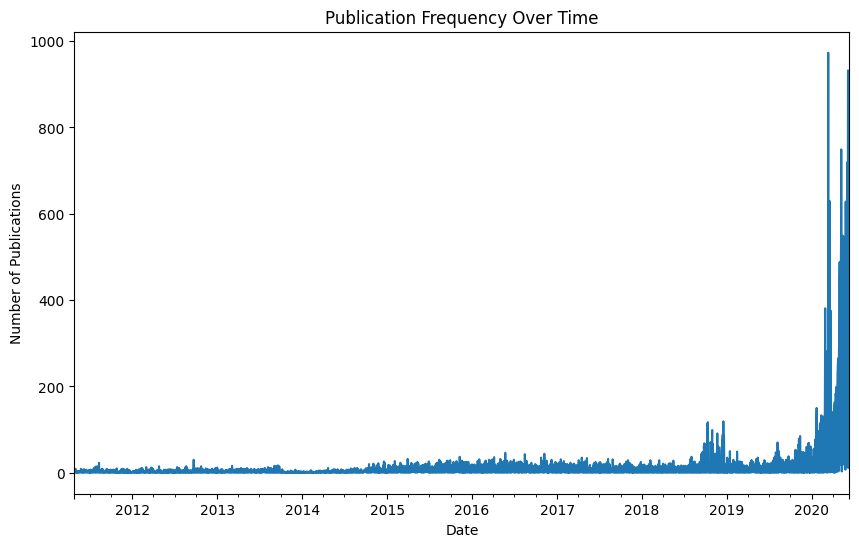

Spikes in publication frequency:
date
2018-09-24     61
2018-09-25     55
2018-09-26     68
2018-10-04     66
2018-10-08    113
             ... 
2020-06-05    932
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Length: 146, dtype: int64


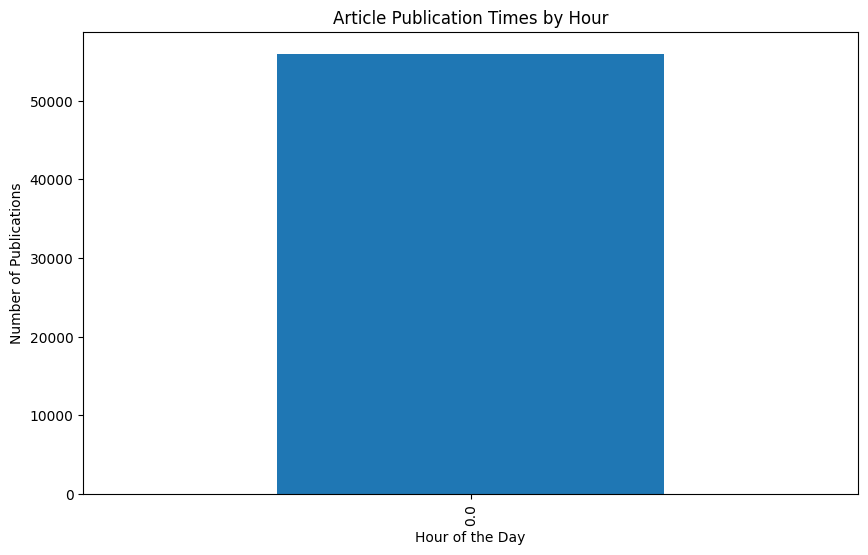

In [18]:

# Step 1: Load the raw data
raw_data = pd.read_csv("../data/raw_analyst_ratings.csv")

# Step 2: Convert the 'date' column to a consistent date format (YYYY-MM-DD)
raw_data['date'] = pd.to_datetime(raw_data['date'], errors='coerce').dt.date

# Optional: Print a single date for verification (e.g., the 4th date in the DataFrame)
print("Fourth date in the DataFrame:", raw_data['date'].iloc[3])

# Step 3: Convert the date back to datetime if necessary and set it as the index
raw_data['date'] = pd.to_datetime(raw_data['date'])
raw_data.set_index('date', inplace=True)

# Step 4: Resample the data to observe publication frequency (e.g., daily frequency)
daily_counts = raw_data.resample('D').size()

# Step 5: Plot the publication frequency over time
plt.figure(figsize=(10, 6))
daily_counts.plot(title='Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.show()

# Step 6: Detect spikes in publication frequency above a certain threshold
threshold = 50  # You can adjust this threshold based on your data
spikes = daily_counts[daily_counts > threshold]
print("Spikes in publication frequency:")
print(spikes)

# Step 7: Analyze the time of day when articles are most frequently published
raw_data['hour'] = raw_data.index.hour  # Extract hour from the datetime index
hourly_counts = raw_data.groupby('hour').size()

# Step 8: Plot the distribution of publication times by hour
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', title='Article Publication Times by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Publications')
plt.show()



# Publisher analysis

In [17]:


# Load the data
data = pd.read_csv('../data/cleaned_analyst_ratings.csv')

# Verify the column names
print("Columns in DataFrame:", data.columns)

# Assuming 'url' is the column name for publisher URLs
publisher_column = "url"  # Updated to match the correct column name

# Assuming 'headline' is the column for the type of news
type_column = "headline"  # Ensure this is correct based on your data inspection

# Extract domains from publisher URLs
data['Domain'] = data[publisher_column].apply(lambda x: re.findall(r'https?://(www\.)?([^/]+)', x)[0][1] if pd.notnull(x) else None)

# Get unique domains
unique_domains = data['Domain'].unique()
print("\nUnique Domains:")
print(unique_domains)

# Count the occurrences of each domain
domain_counts = Counter(data['Domain'].dropna())
print("\nPublisher Contribution:")
print(domain_counts.most_common())

# Analyze the type of news reported by each domain
domain_news_type = data.groupby(['Domain', type_column]).size().unstack(fill_value=0)
print("\nNews Type Analysis:")
print(domain_news_type)

# Find the domain with the most contributions
most_frequent_contributor = domain_counts.most_common(1)
print("\nMost Frequent Contributor:")
print(most_frequent_contributor)


Columns in DataFrame: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

Unique Domains:
['benzinga.com']

Publisher Contribution:
[('benzinga.com', 55987)]

News Type Analysis:
headline      "Nuclear Verdict" Kills 540 Truck Carrier  \
Domain                                                    
benzinga.com                                          1   

headline      "Stay at Home" Stocks Still Rule the Roost as Nvidia, Microsoft, Apple Start Week Firmly  \
Domain                                                                                                   
benzinga.com                                                  2                                          

headline      #AdiosProductosGringos: Border Wall Backlash Leads Mexicans To Boycott American Products  \
Domain                                                                                                   
benzinga.com                                                  1             